In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(os.path.join("../data/master_dataset_1700-2021.csv"))
df.head()

,Year,Country,Population,Life Expectancy Years,GDP (income per capita),Fertility Rate,Child Motality 0-5 YO,Education (female 15-44),Contraceptive Use percent
0,1799,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN
1,1800,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN
2,1801,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN
3,1802,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN
4,1803,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN


In [4]:
df = df.dropna(axis=1)
df = df.reset_index(drop=True)
df

,Year,Country,Population,Life Expectancy Years,GDP (income per capita),Fertility Rate,Child Motality 0-5 YO
0,1799,Bangladesh,19200000,25.5,876,6.70,508.00
1,1800,Bangladesh,19200000,25.5,876,6.70,508.00
2,1801,Bangladesh,19300000,25.5,876,6.70,508.00
3,1802,Bangladesh,19300000,25.5,876,6.70,508.00
4,1803,Bangladesh,19300000,25.5,876,6.70,508.00
...,...,...,...,...,...,...,...
3116,2017,United States,327000000,78.6,55700,1.90,6.53
3117,2018,United States,329000000,78.6,56700,1.90,6.58
3118,2019,United States,331000000,78.6,57500,1.89,6.62
3119,2020,United States,333000000,78.7,58200,1.89,6.64


In [5]:
#TABLE 2, GDP per Capita vs Fertility Rate
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df[["Life Expectancy Years", "Child Motality 0-5 YO"]]
y = df["Fertility Rate"].values.reshape(-1, 1)

#print(model['Fertility Rate'].shape)
print("Shape: ", X.shape, y.shape)

Shape:  (3121, 2) (3121, 1)


In [6]:
 # Plot the data to see if a linear trend exists

### BEGIN SOLUTION
#plt.scatter(X, y)
#plt.xlabel("Fertility Rate")
#plt.ylabel("GDP per Capita")
### END SOLUTION

In [7]:
 # Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:
 # Create the model


from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [9]:
# Fit the model to the training data. 


model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6193001547337498
Testing Score: 0.6063458237379368


In [11]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score


# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 0.9814818936852981
R-squared (R2 ): 0.6063458237379368


Text(0.5, 1.0, 'Residual Plot')

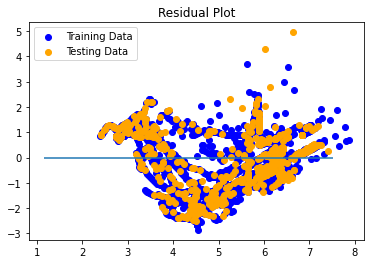

In [12]:
 # Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
 # Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)

0.6063458237379368